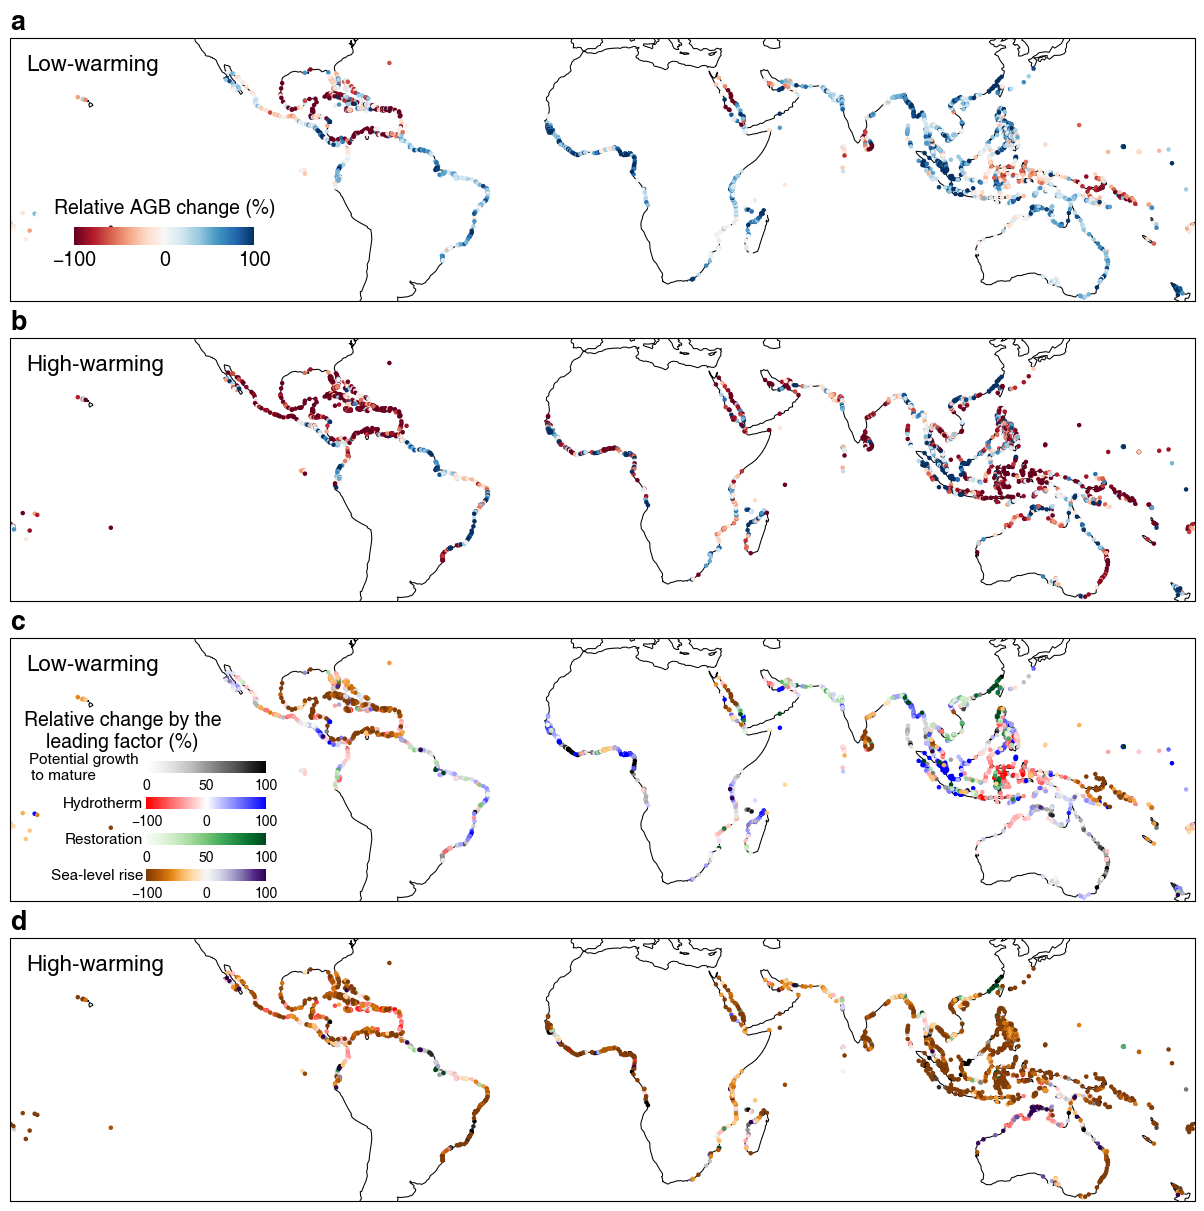

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import Normalize
import pickle

# 加载数据
with open('../data/DIVA_data/Coast_with_Mang.pkl', 'rb') as f:
    data = pickle.load(f)

# 选择Pop5和恢复策略50%
area_after_SLR_126 = data['area_after_SLR_126'][:, 1]
area_after_SLR_585 = data['area_after_SLR_585'][:, 1]
area_restoration_126 = data['area_restoration_126'][:, 0]
area_restoration_585 = data['area_restoration_585'][:, 0]

# 提取agb和area数据
agb_present = data['agb_present']
agb_grow = data['agb_grow']
agb_126 = data['agb_126']
agb_585 = data['agb_585']
area = data['area']
lat_lon_coast = data['lat_lon_coast']

# 数据处理
lat = lat_lon_coast[:, 0]
lon = lat_lon_coast[:, 1]

# 计算百分比变化
Grow_change_Percent_126 = (agb_grow - agb_present) / agb_present
HT_change_Percent_126 = (agb_126 - agb_grow) / agb_present
Res_change_Percent_126 = (agb_126 * area_restoration_126) / (agb_present * area)
SLR_change_Percent_126 = ((area_after_SLR_126 - area) * agb_126) / (agb_present * area)
Total_change_Percent_126 = Grow_change_Percent_126 + HT_change_Percent_126 + Res_change_Percent_126 + SLR_change_Percent_126

Grow_change_Percent_585 = (agb_585 - agb_present) / agb_present
HT_change_Percent_585 = (agb_585 - agb_grow) / agb_present
Res_change_Percent_585 = (agb_585 * area_restoration_585) / (agb_present * area)
SLR_change_Percent_585 = ((area_after_SLR_585 - area) * agb_585) / (agb_present * area)
Total_change_Percent_585 = Grow_change_Percent_585 + HT_change_Percent_585 + Res_change_Percent_585 + SLR_change_Percent_585

# 清除NaN值
data_126 = np.column_stack((lat, lon, Grow_change_Percent_126, HT_change_Percent_126, Res_change_Percent_126, SLR_change_Percent_126, Total_change_Percent_126))
data_126 = data_126[~np.isnan(data_126).any(axis=1)]

lat_126 = data_126[:, 0]
lon_126 = data_126[:, 1]
Grow_change_Percent_126 = data_126[:, 2] * 100
HT_change_Percent_126 = data_126[:, 3] * 100
Res_change_Percent_126 = data_126[:, 4] * 100
SLR_change_Percent_126 = data_126[:, 5] * 100
Total_change_Percent_126 = data_126[:, 6] * 100

data_585 = np.column_stack((lat, lon, Grow_change_Percent_585, HT_change_Percent_585, Res_change_Percent_585, SLR_change_Percent_585, Total_change_Percent_585))
data_585 = data_585[~np.isnan(data_585).any(axis=1)]

lat_585 = data_585[:, 0]
lon_585 = data_585[:, 1]
Grow_change_Percent_585 = data_585[:, 2] * 100
HT_change_Percent_585 = data_585[:, 3] * 100
Res_change_Percent_585 = data_585[:, 4] * 100
SLR_change_Percent_585 = data_585[:, 5] * 100
Total_change_Percent_585 = data_585[:, 6] * 100

# 计算绝对变化
Grow_change_Percent_1_126 = np.abs(Grow_change_Percent_126)
HT_change_Percent_1_126 = np.abs(HT_change_Percent_126)
Res_change_Percent_1_126 = np.abs(Res_change_Percent_126)
SLR_change_Percent_1_126 = np.abs(SLR_change_Percent_126)

I_126 = np.argmax(np.column_stack((Grow_change_Percent_1_126, HT_change_Percent_1_126, Res_change_Percent_1_126, SLR_change_Percent_1_126)), axis=1)

max_abs_1_126 = Grow_change_Percent_126[I_126 == 0]
lat_1_126 = lat_126[I_126 == 0]
lon_1_126 = lon_126[I_126 == 0]
max_abs_2_126 = HT_change_Percent_126[I_126 == 1]
lat_2_126 = lat_126[I_126 == 1]
lon_2_126 = lon_126[I_126 == 1]
max_abs_3_126 = Res_change_Percent_126[I_126 == 2]
lat_3_126 = lat_126[I_126 == 2]
lon_3_126 = lon_126[I_126 == 2]
max_abs_4_126 = SLR_change_Percent_126[I_126 == 3]
lat_4_126 = lat_126[I_126 == 3]
lon_4_126 = lon_126[I_126 == 3]

Grow_change_Percent_1_585 = np.abs(Grow_change_Percent_585)
HT_change_Percent_1_585 = np.abs(HT_change_Percent_585)
Res_change_Percent_1_585 = np.abs(Res_change_Percent_585)
SLR_change_Percent_1_585 = np.abs(SLR_change_Percent_585)

I_585 = np.argmax(np.column_stack((Grow_change_Percent_1_585, HT_change_Percent_1_585, Res_change_Percent_1_585, SLR_change_Percent_1_585)), axis=1)

max_abs_1_585 = Grow_change_Percent_585[I_585 == 0]
lat_1_585 = lat_585[I_585 == 0]
lon_1_585 = lon_585[I_585 == 0]
max_abs_2_585 = HT_change_Percent_585[I_585 == 1]
lat_2_585 = lat_585[I_585 == 1]
lon_2_585 = lon_585[I_585 == 1]
max_abs_3_585 = Res_change_Percent_585[I_585 == 2]
lat_3_585 = lat_585[I_585 == 2]
lon_3_585 = lon_585[I_585 == 2]
max_abs_4_585 = SLR_change_Percent_585[I_585 == 3]
lat_4_585 = lat_585[I_585 == 3]
lon_4_585 = lon_585[I_585 == 3]

# Set global font to Helvetica
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 16
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Helvetica'
plt.rcParams['mathtext.it'] = 'Helvetica:italic'
plt.rcParams['mathtext.bf'] = 'Helvetica:bold'

# Set figure size and layout
fig = plt.figure(figsize=(12, 12), constrained_layout=True)
grid = fig.add_gridspec(4, 1)

ax1 = fig.add_subplot(grid[0], projection=ccrs.PlateCarree())
ax1.set_extent([-180, 180, -40, 40])
ax1.set_title('a', loc='left', fontweight='bold')
ax1.text(-175, 35, 'Low-warming', ha='left', va='top')
ax1.coastlines(resolution='110m', linewidth=0.75, color='black', zorder=0)
scatter_126 = ax1.scatter(lon_126, lat_126, c=Total_change_Percent_126, cmap=plt.get_cmap('RdBu'), norm=Normalize(vmin=-100, vmax=100), s=5)

ax2 = fig.add_subplot(grid[1], projection=ccrs.PlateCarree())
ax2.set_extent([-180, 180, -40, 40])
ax2.set_title('b', loc='left', fontweight='bold')
ax2.text(-175, 35, 'High-warming', ha='left', va='top')
ax2.coastlines(resolution='110m', linewidth=0.75, color='black', zorder=0)
scatter_585 = ax2.scatter(lon_585, lat_585, c=Total_change_Percent_585, cmap=plt.get_cmap('RdBu'), norm=Normalize(vmin=-100, vmax=100), s=5)

ax3 = fig.add_subplot(grid[2], projection=ccrs.PlateCarree())
ax3.set_extent([-180, 180, -40, 40])
ax3.set_title('c', loc='left', fontweight='bold')
ax3.text(-175, 35, 'Low-warming', ha='left', va='top')
ax3.coastlines(resolution='110m', linewidth=0.75, color='black', zorder=0)
scatter_1_126 = ax3.scatter(lon_1_126, lat_1_126, c=max_abs_1_126, cmap=plt.get_cmap('Greys'), norm=Normalize(vmin=0, vmax=100), s=5)
scatter_2_126 = ax3.scatter(lon_2_126, lat_2_126, c=max_abs_2_126, cmap=plt.get_cmap('bwr_r'), norm=Normalize(vmin=-100, vmax=100), s=5)
scatter_3_126 = ax3.scatter(lon_3_126, lat_3_126, c=max_abs_3_126, cmap=plt.get_cmap('Greens'), norm=Normalize(vmin=0, vmax=100), s=5)
scatter_4_126 = ax3.scatter(lon_4_126, lat_4_126, c=max_abs_4_126, cmap=plt.get_cmap('PuOr'), norm=Normalize(vmin=-100, vmax=100), s=5)

ax4 = fig.add_subplot(grid[3], projection=ccrs.PlateCarree())
ax4.set_extent([-180, 180, -40, 40])
ax4.set_title('d', loc='left', fontweight='bold')
ax4.text(-175, 35, 'High-warming', ha='left', va='top')
ax4.coastlines(resolution='110m', linewidth=0.75, color='black', zorder=0)
scatter_1_585 = ax4.scatter(lon_1_585, lat_1_585, c=max_abs_1_585, cmap=plt.get_cmap('Greys'), norm=Normalize(vmin=0, vmax=100), s=5)
scatter_2_585 = ax4.scatter(lon_2_585, lat_2_585, c=max_abs_2_585, cmap=plt.get_cmap('bwr_r'), norm=Normalize(vmin=-100, vmax=100), s=5)
scatter_3_585 = ax4.scatter(lon_3_585, lat_3_585, c=max_abs_3_585, cmap=plt.get_cmap('Greens'), norm=Normalize(vmin=0, vmax=100), s=5)
scatter_4_585 = ax4.scatter(lon_4_585, lat_4_585, c=max_abs_4_585, cmap=plt.get_cmap('PuOr'), norm=Normalize(vmin=-100, vmax=100), s=5)

# Add colorbars
cbar_ax_126 = fig.add_axes([0.06, 0.80, 0.15, 0.015])
cbar_126 = plt.colorbar(scatter_126, cax=cbar_ax_126, orientation='horizontal')
cbar_126.ax.set_title('Relative AGB change (%)', fontsize=14, pad=10)
cbar_126.set_ticks([-100, 0, 100])
cbar_126.ax.tick_params(labelsize=14, length=0)
cbar_126.outline.set_visible(False)

cbar_ax1_126 = fig.add_axes([0.12, 0.36, 0.1, 0.01])
cbar1_126 = plt.colorbar(scatter_1_126, cax=cbar_ax1_126, orientation='horizontal')
cbar1_126.ax.set_title('Relative change by the\nleading factor (%)', fontsize=14, pad=10, x=-0.2)
cbar_ax2_126 = fig.add_axes([0.12, 0.33, 0.1, 0.01])
cbar2_126 = plt.colorbar(scatter_2_126, cax=cbar_ax2_126, orientation='horizontal')
cbar_ax3_126 = fig.add_axes([0.12, 0.30, 0.1, 0.01])
cbar3_126 = plt.colorbar(scatter_3_126, cax=cbar_ax3_126, orientation='horizontal')
cbar_ax4_126 = fig.add_axes([0.12, 0.27, 0.1, 0.01])
cbar4_126 = plt.colorbar(scatter_4_126, cax=cbar_ax4_126, orientation='horizontal')

cbar1_126.ax.text(-0.03, 0.5, 'Potential growth \nto mature           ', va='center', ha='right', fontsize=11, transform=cbar1_126.ax.transAxes)
cbar2_126.ax.text(-0.03, 0.5, 'Hydrotherm', va='center', ha='right', fontsize=11, transform=cbar2_126.ax.transAxes)
cbar3_126.ax.text(-0.03, 0.5, 'Restoration', va='center', ha='right', fontsize=11, transform=cbar3_126.ax.transAxes)
cbar4_126.ax.text(-0.03, 0.5, 'Sea-level rise', va='center', ha='right', fontsize=11, transform=cbar4_126.ax.transAxes)

for cbar in [cbar1_126, cbar2_126, cbar3_126, cbar4_126]:
    cbar.ax.tick_params(labelsize=10, length=0)
    cbar.outline.set_visible(False)

plt.savefig('../fig/py03_change_distribution.jpg', dpi=800)
plt.show()